In [1]:
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
from pathlib import Path

In [2]:
merimen_path = Path('/mmdetection/data/coco_datasets/datasets/merimen_coco/19_02_2022/')


In [3]:
scratch_merimen = json.load(open(merimen_path/'scratch'/'annotations'/'total.json'))
dent_merimen = json.load(open(merimen_path/'dent'/'annotations'/'total.json'))

In [13]:
num_imgs_scratch_merimen = len(scratch_merimen['images'])
num_annos_scratch_merimen = len(scratch_merimen['annotations'])
print('MERIMEN DATA')
print('damage : scratch')
print('number of images : ',num_imgs_scratch_merimen)
print('number of annotations : ',num_annos_scratch_merimen)
print('number of annotations per image : ',num_annos_scratch_merimen/num_imgs_scratch_merimen)

print('-'*20)

num_imgs_dent_merimen = len(dent_merimen['images'])
num_annos_dent_merimen = len(dent_merimen['annotations'])
print('damage : dent')
print('number of images : ',num_imgs_dent_merimen)
print('number of annotations : ',num_annos_dent_merimen)
print('number of annotations per image : ',num_annos_dent_merimen/num_imgs_dent_merimen)


MERIMEN DATA
damage : scratch
number of images :  90298
number of annotations :  185348
number of annotations per image :  2.0526257502934726
--------------------
damage : dent
number of images :  112268
number of annotations :  160885
number of annotations per image :  1.4330441443688318


In [6]:
path = Path('/mmdetection/data/coco_datasets/datasets/')


In [7]:
scratch = json.load(open(path/'scratch'/'annotations'/'train.json'))
dent = json.load(open(path/'dent'/'annotations'/'train.json'))

In [14]:
num_imgs_scratch = len(scratch['images'])
num_annos_scratch = len(scratch['annotations'])
print('OLD DATA')
print('damage : scratch')
print('number of images : ',num_imgs_scratch)
print('number of annotations : ',num_annos_scratch)
print('number of annotations per image : ',num_annos_scratch/num_imgs_scratch)

print('-'*20)

num_imgs_dent = len(dent['images'])
num_annos_dent = len(dent['annotations'])
print('damage : dent')
print('number of images : ',num_imgs_dent)
print('number of annotations : ',num_annos_dent)
print('number of annotations per image : ',num_annos_dent/num_imgs_dent)


OLD DATA
damage : scratch
number of images :  16144
number of annotations :  81642
number of annotations per image :  5.05711100099108
--------------------
damage : dent
number of images :  10725
number of annotations :  17001
number of annotations per image :  1.5851748251748252


In [9]:
def sample(js_data,img_path,img_ids=None):
    #i = random.choice(js_data['images'])
    num = 3
    if img_ids is None:
        imgs = random.sample(js_data['images'],num**2)
    else:
        imgs = [i for i in js_data['images'] if i['id'] in img_ids]
        
        if len(imgs) > num**2 :
            imgs = random.sample(imgs,num**2)
    #print(i['id'],i['url'])
    #num = 2 
    fig, axis = plt.subplots(num, num,figsize=(15,15))
    #print(imgs)
    for idx,i in enumerate(imgs):
        annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) 
                 for a in js_data['annotations'] if a['image_id'] == i['id']]
        image = cv2.imread(str(img_path/'images'/i['file_name']))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.drawContours(image,annos,-1,(255,0,0),2)
        
        axis[int(idx/num),idx%num].imshow(image)
        axis[int(idx/num),idx%num].set_title(i['id'])


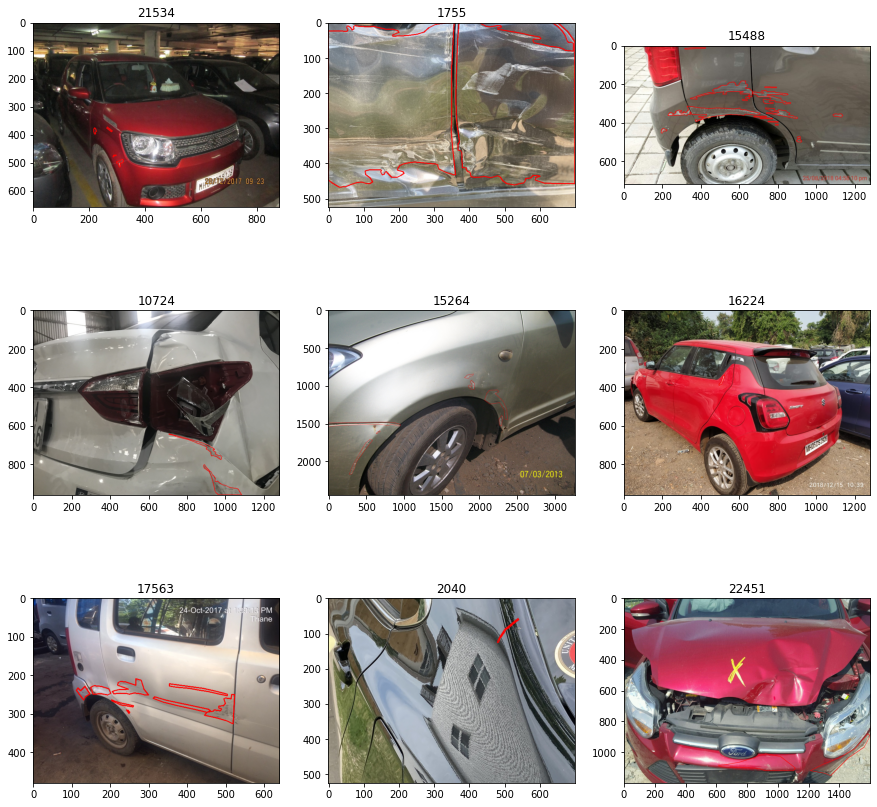

In [10]:
sample(scratch,path/'scratch')

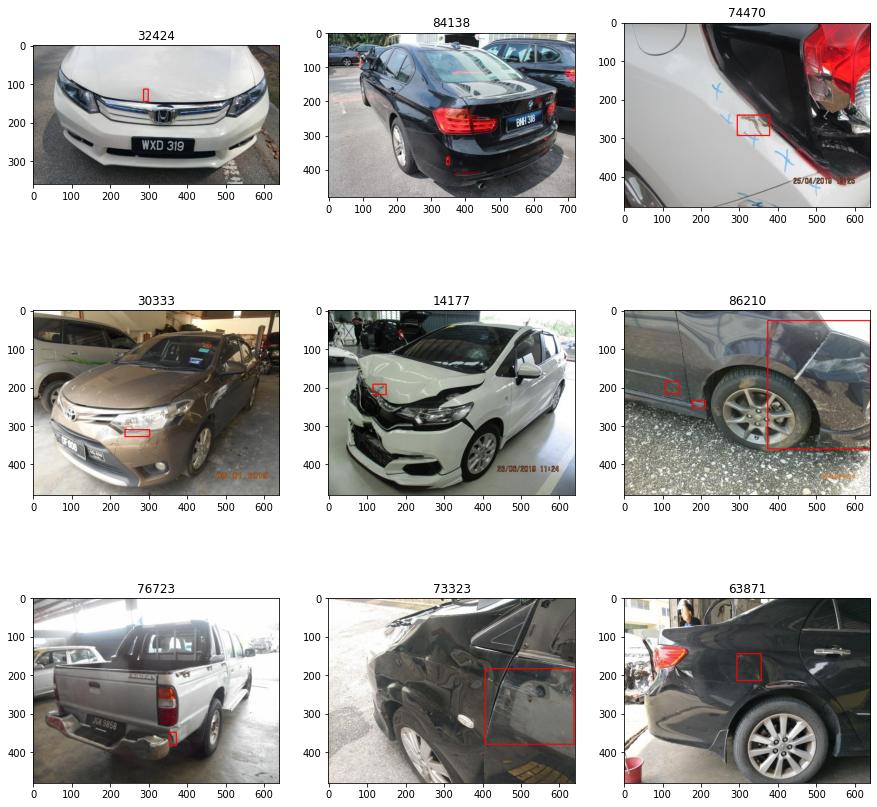

In [11]:
sample(scratch_merimen,merimen_path/'scratch')

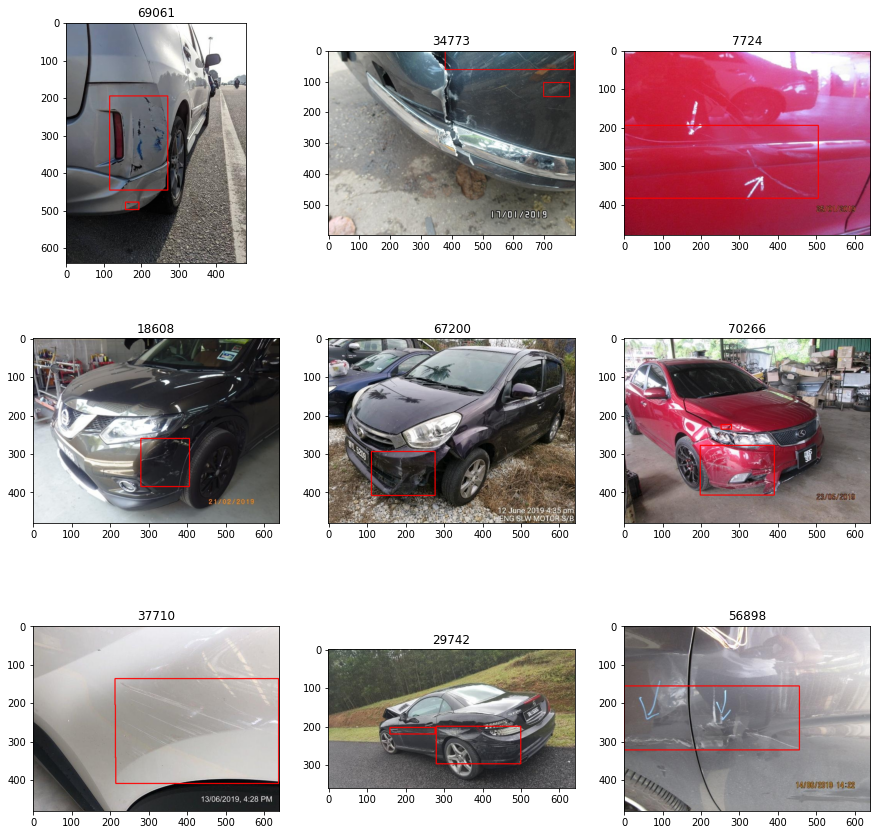

In [12]:
ids = [7724, 47588, 37710, 29742,34773,69061,59413,18608,67200,70266,82994,56898]
sample(scratch_merimen,merimen_path/'scratch',ids)